# **Question 1 : Visualizing Pleiades cluster**

Our beloved astronomy club, Krittika, is named after one of the most conspicuous star cluster in the sky, Pleiades. The CSV file stardata.csv
contains four columns of data, which contain the following data for 196 stars in the cluster:


*   Column 1: RA of each star in degrees
*   Column 2: Declination of each star in degrees
*   Column 3: Parallax of each star in milliarcseconds (mas)
*   Column 4: Apparent Magnitude of the star


Parallax $p$ of a star is directly related to its distance $d$ as $d$ in parsecs $= \frac{1}{p}$ where parallax is in arcseconds.

Before proceeding, you need to be able to read the csv file contents, and since the assignment involves graphs, you might want to import some things as well:

In [1]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
%matplotlib inline

#Making a dataframe 'data' for given 'stardata.csv' file

data=pd.read_csv("stardata.csv",names=['RA','Declination','Parallax','Apparent Magnitude'])

#Now printing dataframe

print(data)


            RA  Declination  Parallax  Apparent Magnitude
0    56.566774    24.189735  7.393535            8.208464
1    56.557355    24.196560  7.545835            7.323018
2    56.613757    24.254807  7.217771            7.339084
3    56.642808    24.138091  3.511365           11.468399
4    56.663986    24.103001  7.418397            9.191837
..         ...          ...       ...                 ...
191  56.085556    24.772663  7.184981           10.851324
192  57.413389    24.227447  0.731824           11.703114
193  57.275547    23.781044  7.209080           10.420579
194  56.352150    23.486739  3.247452           11.549389
195  55.894421    24.593812  0.312350           11.863298

[196 rows x 4 columns]


A little background on magnitude of a star:

Magnitudes in Astronomy are a way to describe how bright an object (in our case, a star) is:

**Apparent magnitude**: Apparent magnitude ($m$) is a measure of the brightness of a star or any other astronomical object observed from the earth. It is similar to the decibel system for sound in that magnitudes are logarithmic and can be calculated according to the formula
$$m = -2.5 \log  { \left ( \dfrac{F}{F_0} \right )} $$
where $F$ is the flux from the star (measured in $W/m^2$), and $F_0$ is a reference flux. 

We can calculate the flux of a star at some distance $d$ away as
$$F = \dfrac{L}{4 \pi d^2}$$

where $L$ is the Luminosity of the star (measured in W).

**Absolute magnitude**: It is the magnitude of the star at a distance of 10 pc, and is related to the apparent magnitude by (and try to see if you can derive this):
$$m-M = -5 + 5\log_{10}(d)$$
where $M$ is the absolute magnitude and $d$ is the distance of the star from us in parsecs (pc).
To read up more about magnitudes, hit up this Wikipedia article - https://en.wikipedia.org/wiki/Magnitude_(astronomy%29.

Using the above info and the earlier relation of distance and parallax, use the imported libraries to find the absolute magnitudes of all the stars of the csv file, and plot a histogram of the distribution, with 50 bins.

In [2]:
#Solution to find Absolute Magnitude
#Defining a variable M that can store Absolute magnitudes
#The formula for absolute magnitude is M=m-10+5log(p) where p is parallax

M=[]

#Now storing the absolute magnitudes in M for which we have to use loop

for i in range(len(data)):
    M.append(data['Apparent Magnitude'][i]-10+ 5*math.log10(data['Parallax'][i]))
    
#Now inserting a new column 'Absolute Magnitude' in 'data' dataframe

data.insert(4,"Absolute Magnitude",M,True)

#Now printing dataframe which contains absolute magnitudes

print(data)


            RA  Declination  Parallax  Apparent Magnitude  Absolute Magnitude
0    56.566774    24.189735  7.393535            8.208464            2.552725
1    56.557355    24.196560  7.545835            7.323018            1.711554
2    56.613757    24.254807  7.217771            7.339084            1.631100
3    56.642808    24.138091  3.511365           11.468399            4.195779
4    56.663986    24.103001  7.418397            9.191837            3.543387
..         ...          ...       ...                 ...                 ...
191  56.085556    24.772663  7.184981           10.851324            5.133452
192  57.413389    24.227447  0.731824           11.703114            1.025148
193  57.275547    23.781044  7.209080           10.420579            4.709978
194  56.352150    23.486739  3.247452           11.549389            4.107103
195  55.894421    24.593812  0.312350           11.863298           -0.663497

[196 rows x 5 columns]


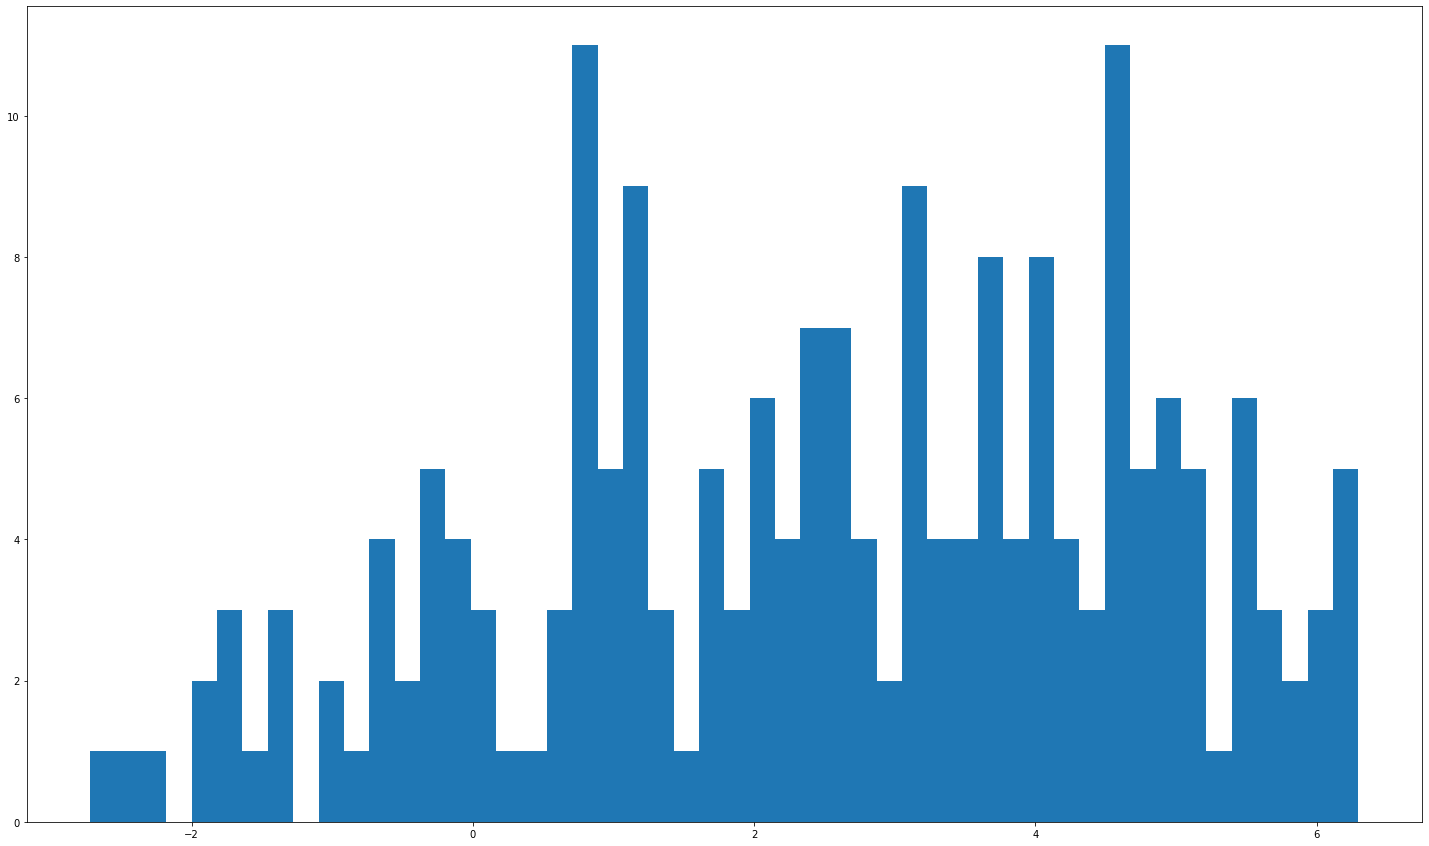

In [3]:
plt.rcParams["figure.figsize"]=[25,15]
plt.hist(data['Absolute Magnitude'],bins=50)
plt.show()

A good way to visualize the actual star cluster as it appears to us in the night sky would be to make a scatter plot of declination and RA on the $y$ and $x$ axes respectively. Try plotting the stars such that the star appears bigger if it is brighter. One way to do this is to make the size of dots in scatter plot proportional to (12 - apparent magnitude) of the star.

(Hint: Google how to make a scatter plot with variable size of dots.)

If you can't make a plot with variable dot sizes, make a simple plot with all dots of same size.

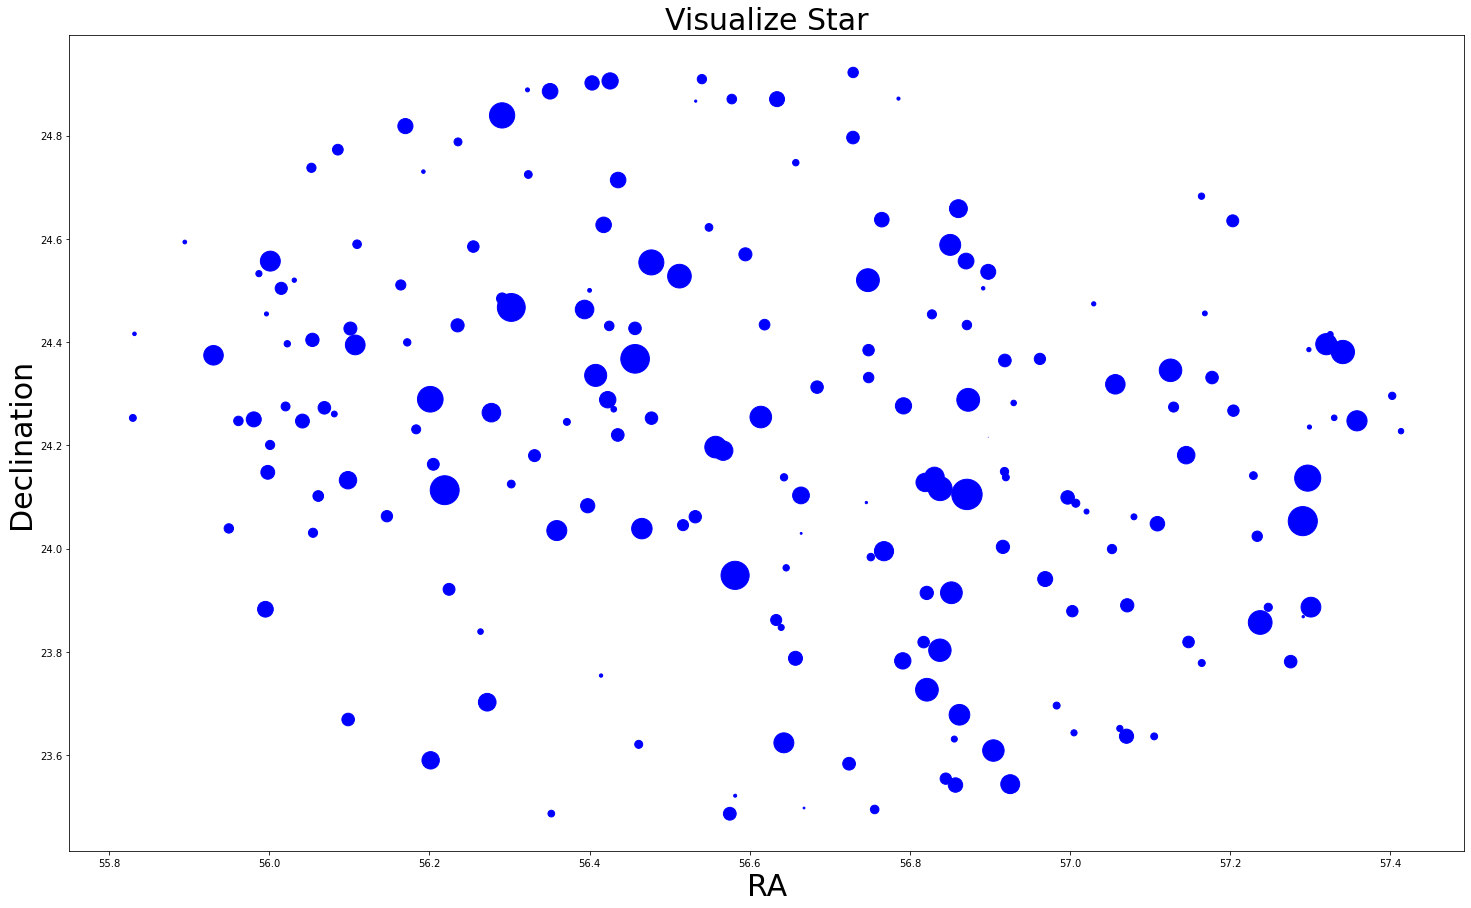

In [4]:
#Making dots of variable size
#Defining variable 'dec' and 'ra' that can store declination of each star in degrees and RA of each star in degrees respectively

dec=[]
ra=[]


#Defining a for loop that can store declination values and RA values in variable 'dec' and 'ra' respectively from dataframe

for i in range(len(data)):
    dec.append(data['Declination'][i])
    ra.append(data['RA'][i])

#Now Defining a variable 'am' which is proportional to (12-apparent magnitude) to change the size of dots

am=[]

#Now using for loop to store values in am corresponding to each apparent magnitude

for i in range(len(data)):
    am.append(100*(12-data['Apparent Magnitude'][i]))
    
#Making a scatter plot of declination and RA on the  𝑦  and  𝑥  axes respectively

x=ra
y=dec
plt.rcParams["figure.figsize"]=[25,15]
plt.scatter(x,y,s=(am),c='b')
plt.title("Visualize Star",fontsize=30)
plt.xlabel('RA',fontsize=30)
plt.ylabel('Declination',fontsize=30)
plt.show()

# **Question 2 : Estimating Age of Universe using Hubble's Law**

In this problem, we will use Hubble's Law on a large number of galaxies, and fit the data to a linear model to find the value of the Hubble Constant, which we will use to calculate the current age of the universe.

You can learn more about Hubble's Law, a very important principle of cosmology and expansion of Universe over here - https://simple.m.wikipedia.org/wiki/Hubble%27s_law 

Step 0: Importing libraries

Dump all the required libraries, and define any necessary constants in the code box below.

You will require the optimize module of scipy library, so be sure to include a line saying `from scipy.optimize import curve_fit`.

In [5]:
#import libraries and define constants

from scipy.optimize import curve_fit as cf

Step 2: Loading the data

Open the file "data.txt" and store it in array(s). First row contains the distance modulus (https://en.m.wikipedia.org/wiki/Distance_modulus) of the galaxy from earth, second row contains the line of sight velocity in km/s.

To convert distance modulus to distance in Megaparsecs (the unit we will be using in the rest of the question), use the formula:

$d = 10^{\left(\frac{d_{dist mod}}{5} - 5\right)}$

where $d$ is in megaparsecs (Mpc).

In [6]:
#Making a dataframe 'pqr' for given 'data.txt' file

pqr=pd.read_csv("data.txt")

#Defining a new variable 'dist' to store converted values from distance modulus to distance 

dist=[]

for i in range(len(pqr)):
    dist.append(10**(pqr['mod0'][i]/5-5))

#Now inserting a new column 'dist' in dataframe 'pqr' and printing it

pqr.insert(2,"dist",dist)
print(pqr)

    

       mod0   vgsr        dist
0     36.65  15080  213.796209
1     37.29  18221  287.078058
2     33.75   3129   56.234133
3     32.66   4486   34.040819
4     33.37   4564   47.206304
...     ...    ...         ...
4059  34.09   4843   65.765784
4060  37.62  23832  334.195040
4061  36.06  11410  162.929603
4062  35.96   9105  155.596563
4063  34.96   7952   98.174794

[4064 rows x 3 columns]


Step 3: Preliminary Data Visualization

Create a function taking the distance to the galaxy, and a slope and an intercept parameter as input, returning recession velocity of that galaxy as output. A code snippet showing how to use curve_fit to find the optimum slope and intercept is shown here - https://github.com/krittikaiitb/tutorials/blob/master/Tutorial_07/SciPy1.ipynb 

Create a scatter plot of the line of sight velocity of the galaxies (in km/s) vs the distance to the galaxies (in Mpc). Also plot the model you just fit in the same graph.

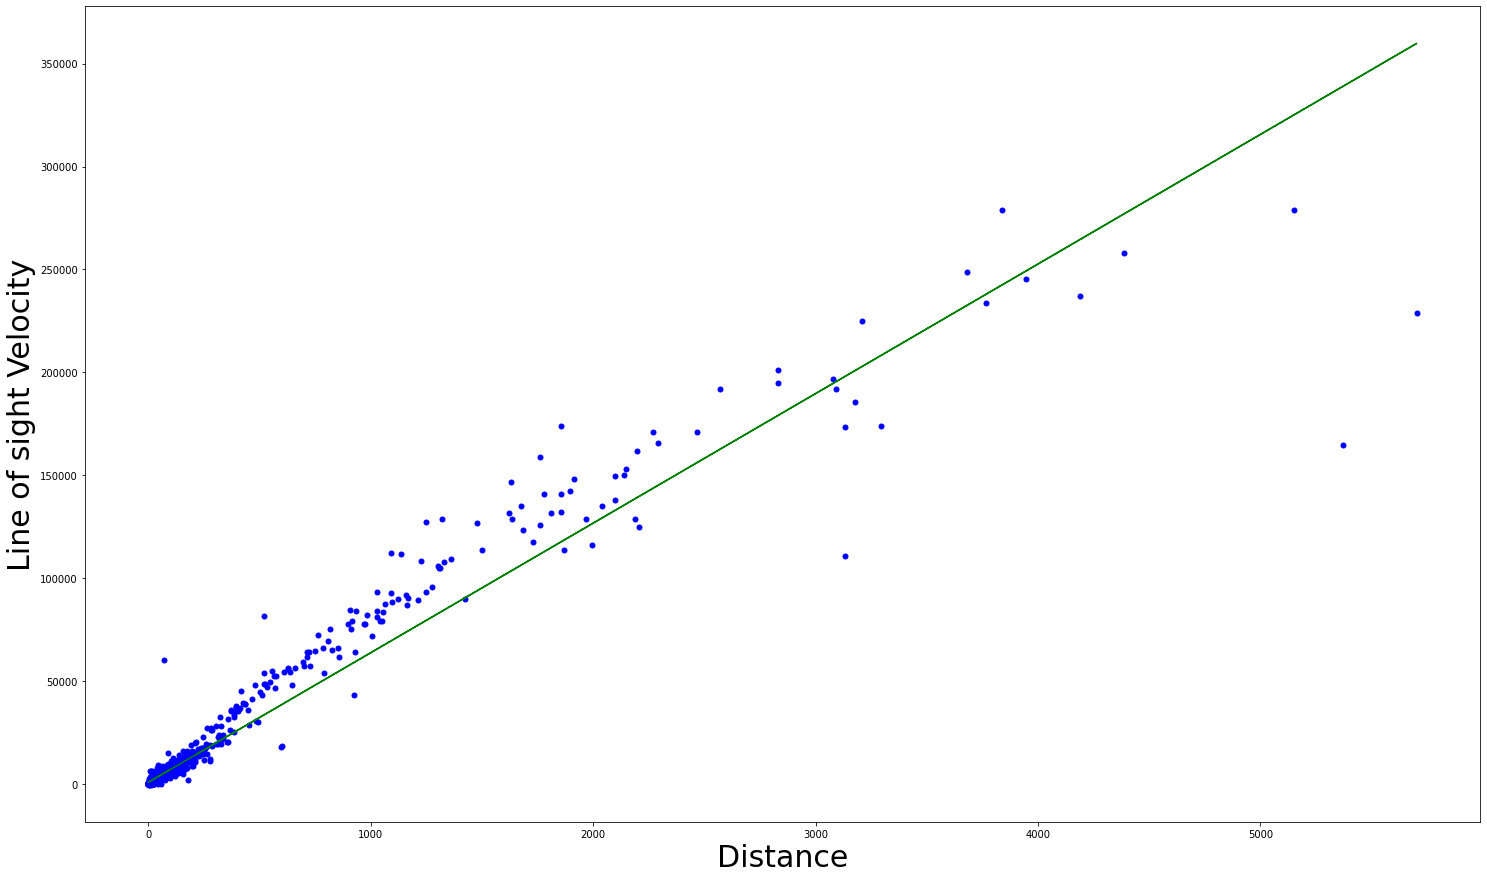

In [7]:
#Now defining a function named 'lin_func' to calculate value of recession velocity

def lin_func(x,m,c):
    return m*x + c

# p_opt is the array that contains optimized values of the parameters, whereas p_cov is the covariance matrix.

p_opt, p_cov = cf(lin_func,pqr['dist'],pqr['vgsr'])

#Now printing the scatter plot 

plt.plot(pqr['dist'],lin_func(pqr['dist'],*p_opt),label='Best Fit',color='g')

plt.rcParams["figure.figsize"]=[25,15]
plt.scatter(x=pqr['dist'],y=pqr['vgsr'],s=25,c='b')
plt.xlabel('Distance',fontsize=30)
plt.ylabel('Line of sight Velocity',fontsize=30)
plt.show()


Step 4: Removing Outliers (OPTIONAL)

As you can see, there are many points on the outskirts of the graph, which may affect out calulations of the slope and intercept unduly. Devise a way to remove those outliers to your satisfaction, and replot the remaining data points. There are multiple ways to do this, a few of them could be:

1. Removing all points whose distances are 3$\times$(Standard Deviation of Distance from Earth) away from the Mean Distance of all input galaxies from Earth. (or take any factor other than 3)

2. Removing all points which are a certain distance away from the best fit line initially calculated (decide yourself what to set this distance as, could be a factor of the mean distance from the line for all points).

In [8]:
#Removing outliers and replotting the improved data

#Defining a variable to store standard deviation of Distance from Earth

std_of_dist=np.std(pqr['dist'])

#Defining a variable to store mean Distance

mean_of_dist=pqr['dist'].mean()

#Defining a variab le to store distance to remove the points above this distance

dist_to_remove=3*std_of_dist + mean_of_dist

#Defining a variable to store index of dataframe to remove the points  

drop_index=[]
for i in range(len(pqr)):
    if pqr['dist'][i]>dist_to_remove:
        drop_index.append(i)


In [9]:
#Dropping the points from the dataframe

for i in range(len(drop_index)):
    pqr=pqr.drop(drop_index[i])


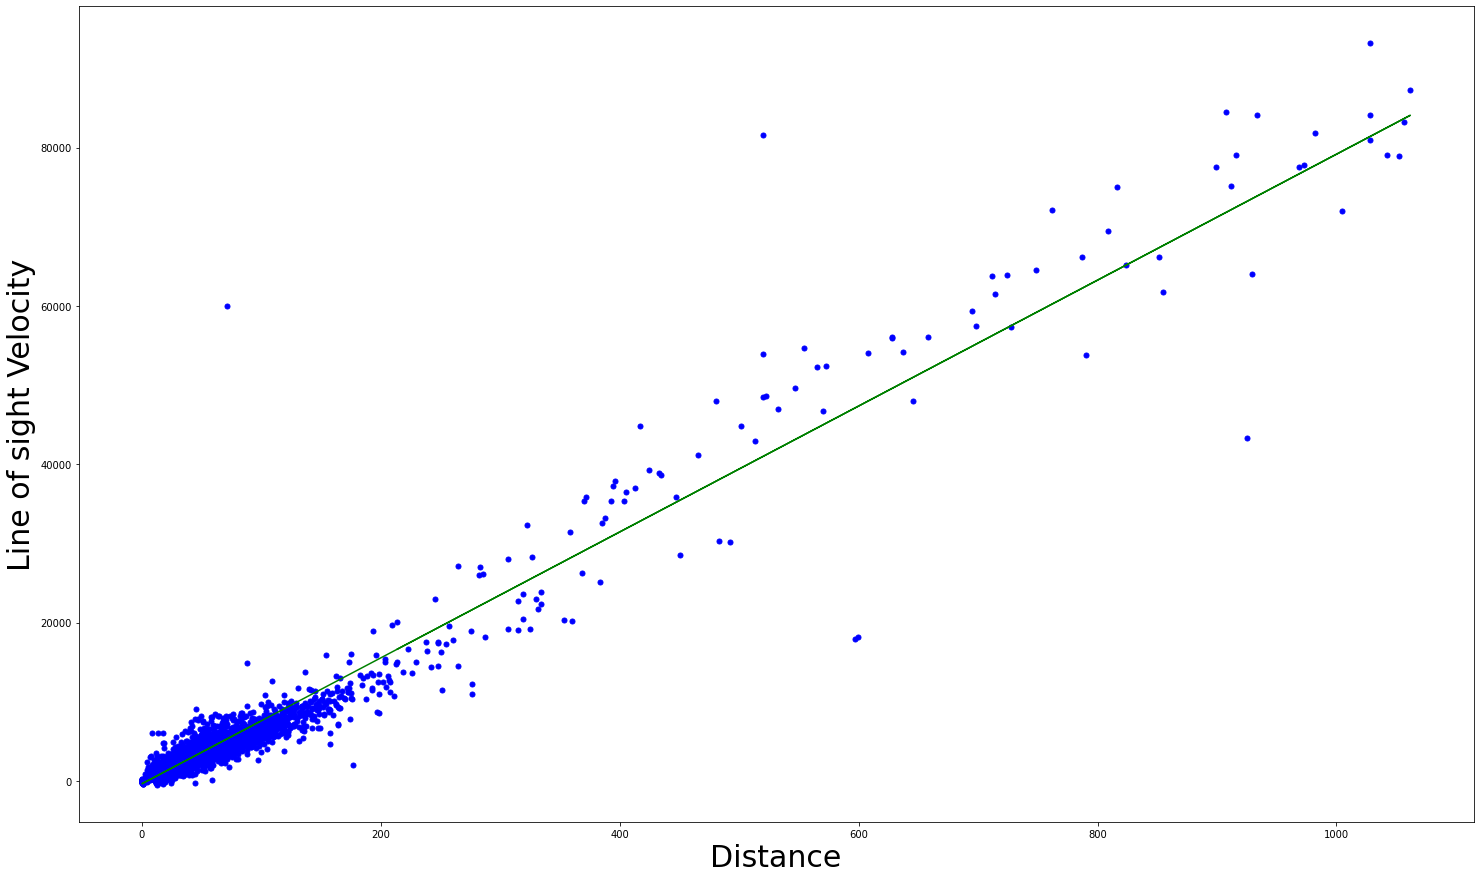

In [10]:
#Now replotting the remaining data points

p_opt, p_cov = cf(lin_func,pqr['dist'],pqr['vgsr'])
plt.plot(pqr['dist'],lin_func(pqr['dist'],*p_opt),label='Best Fit',color='g')

plt.rcParams["figure.figsize"]=[20,10]
plt.scatter(x=pqr['dist'],y=pqr['vgsr'],s=25,c='b')
plt.xlabel('Distance',fontsize=30)
plt.ylabel('Line of sight Velocity',fontsize=30)
plt.show()

Step 5: Conclusion

The slope of the graph (with recessional velocity in the y-axis and distance of the galaxy in the x-axis) gives us the Hubble Constant $H_0$ (in units km/s-Mpc). The reciprocal of the Hubble Constant is a good approximation for the age of the universe. Hence, find the age of the universe using your calculations.

In [11]:
#Defining a variable to store hubble constant

hub_con=p_opt[0]

#Defining a variable to store age of universe

age=1/hub_con

#converting age in years by converting SI units,1 Mpc=3.08e+19,1 Billion=10^9 

print((age*3.08*10**19)/(60*60*24*365*10**9))

12.281420521647656
